In [1]:
import os
import requests

# Create the data folder if it doesn't exist
data_folder = 'data'blob:https://teams.microsoft.com/1beb9761-af12-476d-9829-dfd6b7ed62fd
if not os.path.exists(data_folder):blob:https://teams.microsoft.com/1beb9761-af12-476d-9829-dfd6b7ed62fd
    os.makedirs(data_folder)

# URLs for the files
vocab_url = 'https://huggingface.co/runwayml/stable-diffusion-v1-5/raw/main/tokenizer/vocab.json'
merges_url = 'https://huggingface.co/runwayml/stable-diffusion-v1-5/raw/main/tokenizer/merges.txt'
# ckpt_url = 'https://huggingface.co/runwayml/stable-diffusion-v1-5/raw/main/v1-5-pruned-emaonly.ckpt'

# Download vocab.json and merges.txt
vocab_path = os.path.join(data_folder, 'vocab.json')
merges_path = os.path.join(data_folder, 'merges.txt')

response_vocab = requests.get(vocab_url)
with open(vocab_path, 'wb') as f:
    f.write(response_vocab.content)

response_merges = requests.get(merges_url)
with open(merges_path, 'wb') as f:
    f.write(response_merges.content)

# # Download v1-5-pruned-emaonly.ckpt
# ckpt_path = os.path.join(data_folder, 'v1-5-pruned-emaonly.ckpt')
# response_ckpt = requests.get(ckpt_url)
# with open(ckpt_path, 'wb') as f:
#     f.write(response_ckpt.content)

print("Files downloaded and saved to the 'data' folder.")


Files downloaded and saved to the 'data' folder.


In [2]:
!pip install huggingface_hub  # Install Hugging Face Hub library

import os
from huggingface_hub import hf_hub_download

# Create the data folder if it doesn't exist
data_folder = 'data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Hugging Face model repository and model name
repo_id = "runwayml/stable-diffusion-v1-5"
filename = "v1-5-pruned-emaonly.ckpt"

# Download the model file
ckpt_path = hf_hub_download(repo_id=repo_id, filename=filename, cache_dir=data_folder)

print(f"Model downloaded and saved to {ckpt_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


v1-5-pruned-emaonly.ckpt:   0%|          | 0.00/4.27G [00:00<?, ?B/s]

Model downloaded and saved to data/models--runwayml--stable-diffusion-v1-5/snapshots/1d0c4ebf6ff58a5caecab40fa1406526bca4b5b9/v1-5-pruned-emaonly.ckpt


In [5]:
!pip install pytorch_lightning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
import importlib

Using device: cuda
The tensor is on device: cuda:0


100%|██████████| 45/45 [00:22<00:00,  2.00it/s]


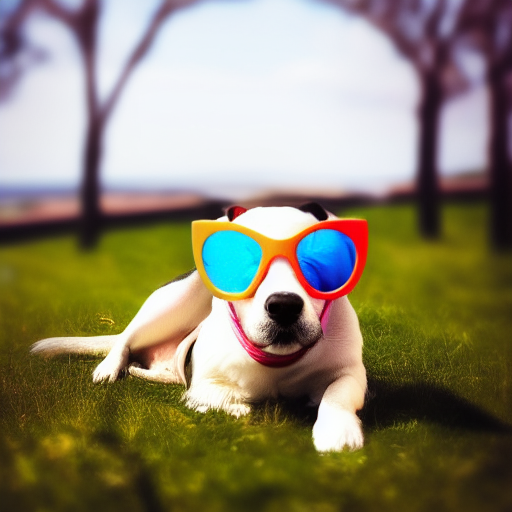

In [6]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

importlib.reload(model_loader)
importlib.reload(pipeline)

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("./data/vocab.json", merges_file="./data/merges.txt")
model_file = "./data/models--runwayml--stable-diffusion-v1-5/snapshots/1d0c4ebf6ff58a5caecab40fa1406526bca4b5b9/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A dog with sunglasses"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "./dog_image.jpeg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

In [ ]:
import torch
from torchvision import transforms

100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


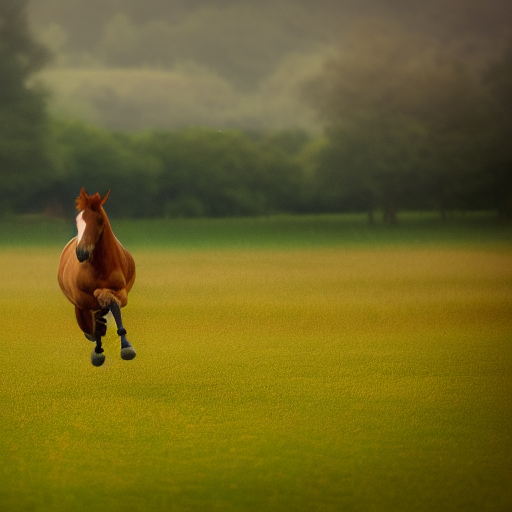

In [9]:
prompt = "Horse running in a field"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "./dog_image.jpeg"
input_image = Image.open(image_path)

# Define a transformation to be applied to the image
# transform = transforms.ToTensor()

# # Convert the image to a PyTorch tensor and add a batch dimension
# tensor_image = transform(input_image).unsqueeze(0)

# # Check if a GPU is available and move the tensor to the GPU
# tensor_image = tensor_image.to(DEVICE)
# outpu_image = transforms.ToPILImage()(tensor_image.squeeze(0))

# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=None,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


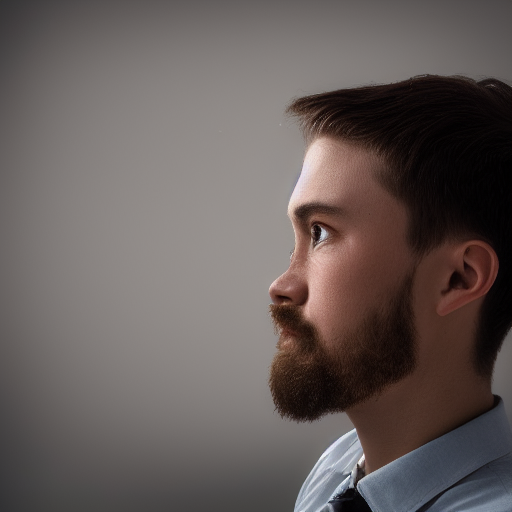

In [ ]:
# prompt: make a image of me using above model

prompt = "A photo of me, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "./images/dog_image.jpeg"
input_image = Image.open(image_path)

# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=None,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)
